In [ ]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries

In [1]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.1 MB/s eta 0:00:00


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [22]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 10

# Create a list of tuples representing location coordinates -
# try to use a random number generator
# (x, y) could be between 0 and 100
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]


depot =(50,50) # Define the coordinates for the depot

num_vehicles = 5 # Define the number of vehicles - (eg 3)

In [23]:
print(f"Number of Locations: {num_locations}")
print(f"Locations: {locations}")
print(f"Depot: {depot}")
print(f"Number of Vehicles: {num_vehicles}")

Number of Locations: 10
Locations: [(87, 97), (6, 5), (12, 80), (100, 58), (2, 15), (20, 56), (58, 0), (54, 25), (88, 16), (83, 38)]
Depot: (50, 50)
Number of Vehicles: 5


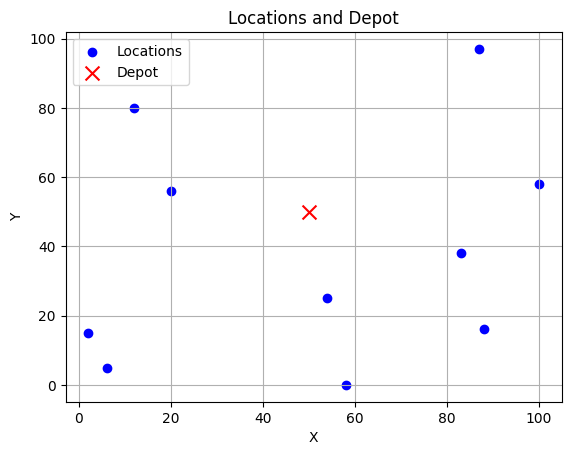

In [24]:
# Plot the locations and depot
x, y = zip(*locations)
plt.scatter(x, y, c='blue', label='Locations')
plt.scatter(*depot, c='red', label='Depot', marker='x', s=100)

plt.title("Locations and Depot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# TASK 3 - Genetic Algorithm Setup
# - Figure out how to represent an individual OR encode an individual
#creator.create("FitnessMin", )
#creator.create("Individual", )


# Define the fitness function as minimizing (e.g., total distance)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# Define an individual as a list of integers representing location indices
creator.create("Individual", list, fitness=creator.FitnessMin)

# Display confirmation
print("Genetic Algorithm setup complete: Fitness and Individual classes created.")


Genetic Algorithm setup complete: Fitness and Individual classes created.


In [26]:
#TASK 4 - Starting with the toolbox and tools
"""toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", #finish defining how to build an individual)
toolbox.register("population", #finish defining how to build an population)"""

# Create the toolbox
toolbox = base.Toolbox()

# Register a function to generate a random permutation of locations
toolbox.register("indices", random.sample, range(num_locations), num_locations)

# Register how to create an individual (a random permutation of locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)

# Register how to create a population (list of individuals)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Display confirmation
print("Toolbox and tools setup complete")


Toolbox and tools setup complete


In [27]:
# Task 5 & 6
#toolbox.register("evaluate", evalVRP)
#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [28]:
# TODO: Task 7 - Configure the genetic operators
"""toolbox.register("mate", # Choose and configure a crossover method)
toolbox.register("mutate", # Choose and configure a mutation method)
toolbox.register("select", # Choose and configure a selection method)"""

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection


# Confirmation message
print("Genetic operators successfully registered in the toolbox.")

Genetic operators successfully registered in the toolbox.


In [29]:
def plot_routes(individual, title="Routes"):
    """Visualizes the routes of the VRP solution.

    Args:
        individual: A DEAP individual representing the solution.
        title: The title of the plot.
    """
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    plt.title(title)

    # Plot the depot as a star
    plt.scatter(depot[0], depot[1], marker="*", s=200, color="red", label="Depot")

    # Plot the locations as circles
    for i, loc in enumerate(locations):
        plt.scatter(loc[0], loc[1], marker="o", s=100, color="blue", label="Location" if i == 0 else "")  # Label only the first location

    # Plot routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        route_x = [loc[0] for loc in vehicle_route]
        route_y = [loc[1] for loc in vehicle_route]
        plt.plot(route_x, route_y, label=f"Vehicle {i + 1}")  # Label each vehicle's route

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

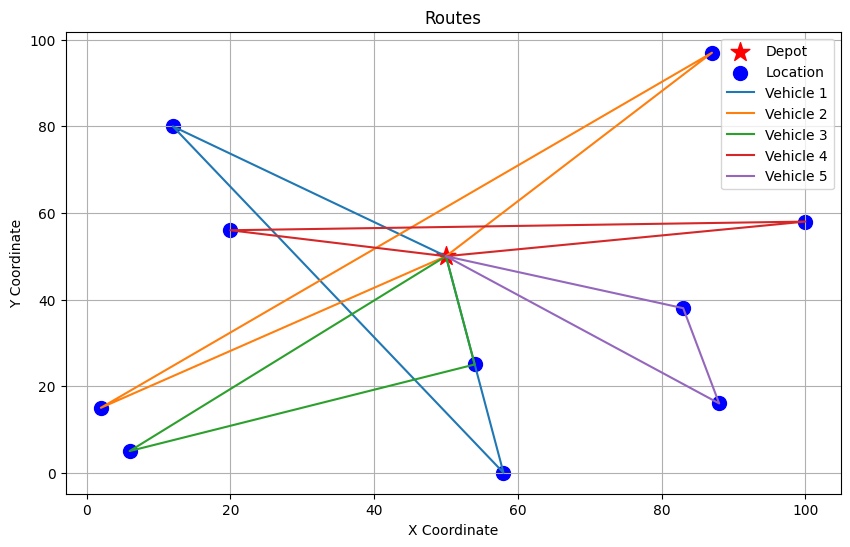

In [30]:
plot_routes(toolbox.individual())